## 4. Non-linear dimension reduction

For this question, the following tasks have been undertaken:

1. Visualizing the data from the file DataKPCA.csv.
2. Training KPCA. 
3. Plotting the variance explained versus KPCA dimensions for up to 10 dimensions. 

In [8]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA as kpca
from sklearn.metrics import mean_squared_error


%matplotlib inline

### Part a

We shall first visualize the data.

In [9]:
df1 = pd.read_csv("DataKPCA.csv")
df1.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


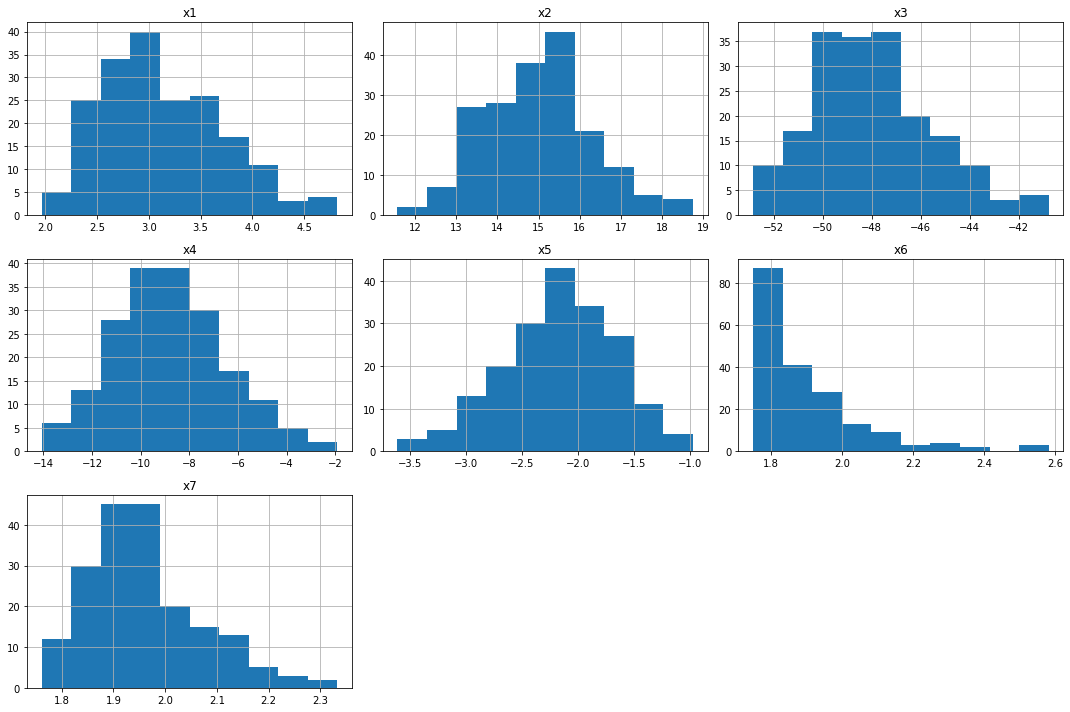

In [10]:
df1[['x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7']].hist(figsize=(15,10))
plt.tight_layout()

We observe that the data provided is reasonably distributed. We shall scale the data next using the standard scaler. 

In [11]:
scaler = StandardScaler()
scaler.fit(df1)
X_scale = scaler.transform(df1)

df_scale = pd.DataFrame(X_scale, columns=df1.columns)
df_scale.head()

,x1,x2,x3,x4,x5,x6,x7
0,-0.893531,0.214228,0.660423,-0.935894,-0.180173,0.263020,0.750311
1,-0.043014,-0.155081,-0.108467,0.005283,-0.089272,-0.268499,-0.334918
2,0.406310,-0.162711,-0.636915,-0.093875,0.823388,-0.884520,0.771011
3,-1.543484,0.032201,1.919837,-2.039160,-0.926059,1.924996,1.692138
4,0.471557,0.100418,-0.614413,0.838262,0.297131,-0.664890,-0.762999


### Part b

After scaling the data, we shall train the KPCA model for 10 components, using the rbf kernel.

The RBF kernel is the Radial Basis Function kernel. RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. 

References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
2. https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

In [26]:
# Train PCA 
kpca1 = kpca(kernel='rbf', n_components = 10).fit(df_scale)   

K-PCA does not have explained_variance_ratio_ like PCA.  This is because after the kernel transformation the data/vectors live in different feature space.

References:
 
1. https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variancea

In [27]:
kpca_transform = kpca1.transform(df_scale)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

In [28]:
# calculate percentage of variation that each pricipal component accounts for
per_vari = np.round(explained_variance_ratio * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_vari)+1)]

### Part c  

Plotting of variance explained vs. KPCA dimensions.

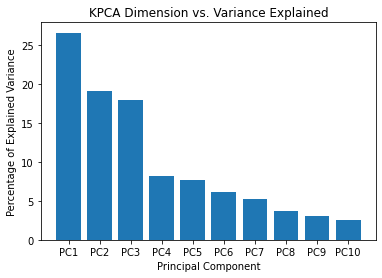

In [29]:
# perpare for plotting
plt.bar(x=range(1,len(per_vari)+1), height=per_vari, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('KPCA Dimension vs. Variance Explained')
plt.show()

From the above plot, we observe that lower order dimensions explain more variance as compared to higher order dimensions.